In [ ]:
!pip install arch

In [ ]:
import yfinance as yf
import pandas as pd
import arch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Define the date range
start_date = "2013-01-01"
end_date = "2022-12-31"

# Download KOSPI data
kospi = yf.download('^KS11', start=start_date, end=end_date)

# Download HSI data
hsi = yf.download('^HSI', start=start_date, end=end_date)

# Combine KOSPI and HSI data
combined_data = pd.concat([kospi['Adj Close'], hsi['Adj Close']], axis=1)
combined_data.columns = ['KOSPI', 'HSI']

# Remove NaN values
combined_data = combined_data.dropna()

# Calculate daily returns for KOSPI and HSI
returns_kospi = combined_data['KOSPI'].pct_change().dropna()
returns_hsi = combined_data['HSI'].pct_change().dropna()

# Specify the realized volatility window (e.g., 22 days for a month)
volatility_window = 3

# Calculate realized volatility for KOSPI and HSI
realized_volatility_kospi = returns_kospi.rolling(window=volatility_window).std().dropna()
realized_volatility_hsi = returns_hsi.rolling(window=volatility_window).std().dropna()

# Estimate the LHAR-RV model using GARCH for KOSPI to HSI
model_kospi_to_hsi = arch.arch_model(returns_kospi, vol='Garch', p=1, q=1)
results_kospi_to_hsi = model_kospi_to_hsi.fit(update_freq=5)

# Estimate the LHAR-RV model using GARCH for HSI to KOSPI
model_hsi_to_kospi = arch.arch_model(returns_hsi, vol='Garch', p=1, q=1)
results_hsi_to_kospi = model_hsi_to_kospi.fit(update_freq=5)

# Align timestamps for realized volatility with predicted volatility
predicted_volatility_kospi_to_hsi = results_kospi_to_hsi.conditional_volatility.reindex(index=realized_volatility_kospi.index)
predicted_volatility_hsi_to_kospi = results_hsi_to_kospi.conditional_volatility.reindex(index=realized_volatility_hsi.index)

# Calculate MAE, MAPE, and RMSE for KOSPI to HSI
mae_kospi_to_hsi = mean_absolute_error(realized_volatility_kospi, predicted_volatility_kospi_to_hsi)*100
mape_kospi_to_hsi = mean_absolute_percentage_error(realized_volatility_kospi, predicted_volatility_kospi_to_hsi)
rmse_kospi_to_hsi = np.sqrt(mean_squared_error(realized_volatility_kospi, predicted_volatility_kospi_to_hsi))*100

# Calculate MAE, MAPE, and RMSE for HSI to KOSPI
mae_hsi_to_kospi = mean_absolute_error(realized_volatility_hsi, predicted_volatility_hsi_to_kospi)*100
mape_hsi_to_kospi = mean_absolute_percentage_error(realized_volatility_hsi, predicted_volatility_hsi_to_kospi)
rmse_hsi_to_kospi = np.sqrt(mean_squared_error(realized_volatility_hsi, predicted_volatility_hsi_to_kospi))*100

# Print the results
print("LHAR-RV Model KOSPI to HSI (GARCH):")
print(f"MAE: {mae_kospi_to_hsi}")
print(f"MAPE: {mape_kospi_to_hsi}")
print(f"RMSE: {rmse_kospi_to_hsi}")

print("\nLHAR-RV Model HSI to KOSPI (GARCH):")
print(f"MAE: {mae_hsi_to_kospi}")
print(f"MAPE: {mape_hsi_to_kospi}")
print(f"RMSE: {rmse_hsi_to_kospi}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7820.761531219083
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7141.520444810345
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 4
LHAR-RV Model KOSPI to HSI (GARCH):
MAE: 0.3636320999806771
MAPE: 1.1022688834857515
RMSE: 0.4902764187908685

LHAR-RV Model HSI to KOSPI (GARCH):
MAE: 0.4842181806388687
MAPE: 1.0079255860450387
RMSE: 0.6297189600288617


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000101. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001657. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
# Define the filename for the CSV file
csv_filename = 'combined_data.csv'

# Export the DataFrame to a CSV file
combined_data.to_csv(csv_filename)

print(f'Data has been exported to {csv_filename}')

Data has been exported to combined_data.csv


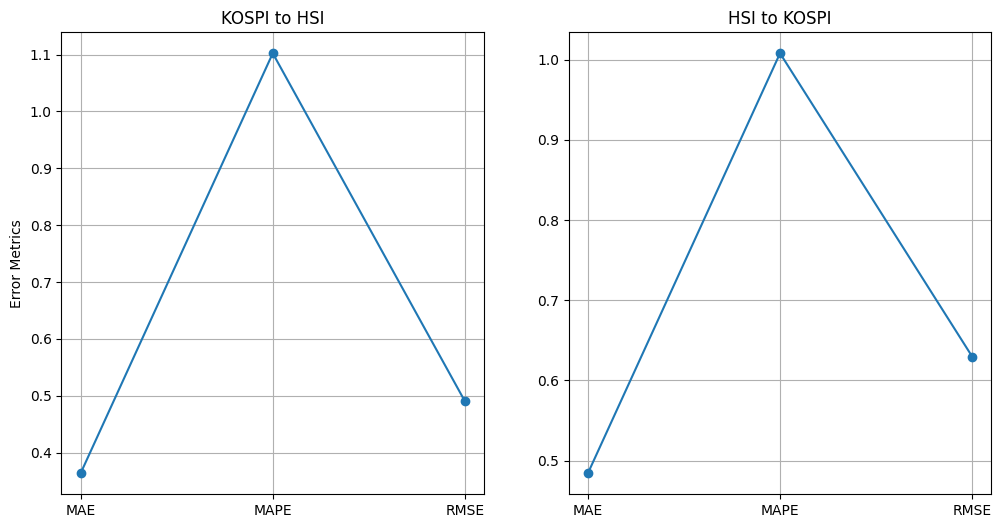

In [ ]:
import matplotlib.pyplot as plt

# Plot MAE, MAPE, and RMSE for KOSPI to HSI
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(['MAE', 'MAPE', 'RMSE'], [mae_kospi_to_hsi, mape_kospi_to_hsi, rmse_kospi_to_hsi], marker='o', linestyle='-')
plt.title('KOSPI to HSI')
plt.ylabel('Error Metrics')
plt.grid()

# Plot MAE, MAPE, and RMSE for HSI to KOSPI
plt.subplot(1, 2, 2)
plt.plot(['MAE', 'MAPE', 'RMSE'], [mae_hsi_to_kospi, mape_hsi_to_kospi, rmse_hsi_to_kospi], marker='o', linestyle='-')
plt.title('HSI to KOSPI')
plt.grid()

plt.show()